In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

%matplotlib inline

# Insert the filename of the graph
filename = "/BUSCO_results"

organism = "Aedes Zammitii - polished"

# Insert the path to graphs folder (destination)
path = '/home/lorenzo/Documenti/busco/ZA_pilished_busco/'

json_file_paths = []

for dir in os.listdir(path): # Numero di data
    if os.path.isdir(path + dir):

        json_file_paths = json_file_paths + [str(path + dir + '/' + x) for x in os.listdir(path + dir) if x.endswith('.json')]

# Loadin json files
json_files = []

for file in json_file_paths:
    with open(file, "r") as f:
        json_files.append(json.load(f))

# How many databases do we have?
dbs = len(json_files)

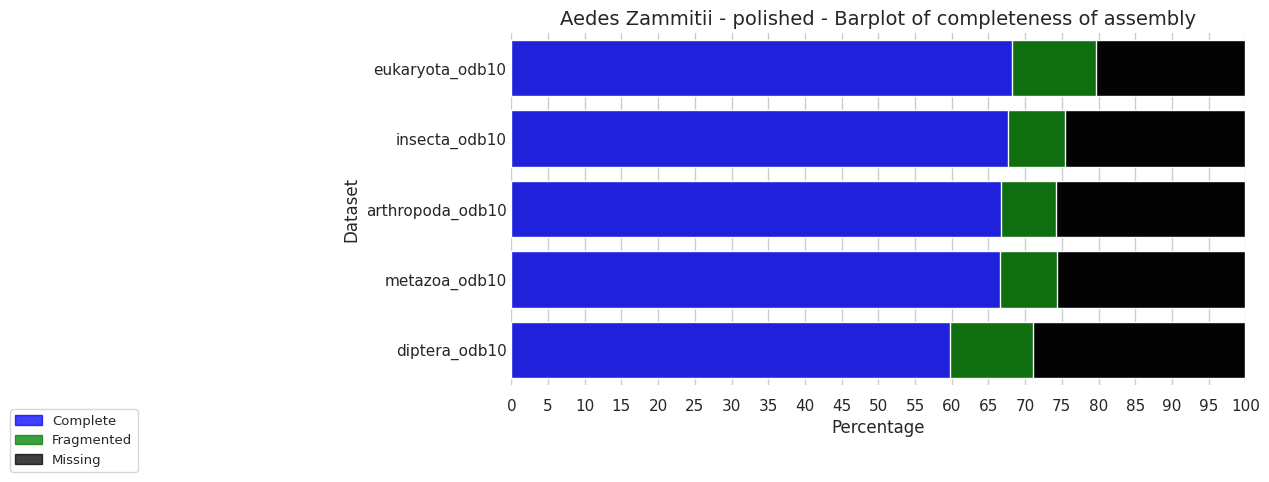

In [2]:
from matplotlib import patches
import matplotlib.ticker as ticker

# Impostazione dello stile di Seaborn
sns.set(style="whitegrid")
colori = ['blue', 'green', 'black']
db_names = [x['lineage_dataset']['name'] for x in json_files]
labels = ['Complete', 'Fragmented', 'Missing']

# Creazione del grafico
fig, ax = plt.subplots(figsize=(15, dbs))

# Creazione della matrice dei valori
values_matrix = np.array([])
for label in labels:
    if values_matrix.size != 0:
        values_matrix = np.vstack([values_matrix, values_matrix[-1] + [file['results'][label] for file in json_files]])
    else:
        values_matrix = np.array([file['results'][label] for file in json_files], ndmin=2)

#########################################################################################################

# Creazione delle singole barre con colori diversi
for idx, label in enumerate(labels):
    sns.barplot(x=values_matrix[-idx-1], color=colori[-idx-1], y=db_names, ax=ax, errorbar=None, alpha=0.99)
    
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# Personalizzazione dell'asse x, y e degli spazi dei ticks
ax.set_xlabel('Percentage', fontsize=12)
ax.set_ylabel('Dataset', fontsize=12)
ax.set_title(organism + ' - Barplot of completeness of assembly', fontsize=14)

# Set the x-axis limits
ax.set_xlim(0, 100)

# Rimozione dei bordilist(h[-1]) del grafico
sns.despine(top=True, right=True, left=True, bottom=True)

# Rimozione dei ticks dell'asse y
ax.tick_params(axis='y', length=0)

# Legenda
patches_list = [patches.Patch(color=colori[i], label=labels[i], alpha=0.75) for i in range(len(labels))]
ax.legend(handles=patches_list, bbox_to_anchor=(-0.5, -0.05), fontsize="9.5")

plt.tight_layout()

plt.savefig(path + filename + '_completeness.png', bbox_inches = 'tight', dpi=300)

plt.show()